In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from PIL import Image

In [2]:
df = pd.DataFrame(columns=['x', 'y', 'shape'])

rows = []

for split in ['Train', 'Test']:

    split_dir =  os.path.join(os.getcwd(), split)
    
    d_in = os.path.join(split_dir, 'Input')
    d_out = os.path.join(split_dir, 'Output')

    for subdir in os.listdir(d_in):
        subdir_in = os.path.join(d_in, subdir)
        subdir_out = os.path.join(d_out, subdir)

        xs = [fn for fn in os.listdir(subdir_in) if fn.endswith('.jpg')]
        ys = [f'a ({fn[:-4]}).jpg' for fn in xs]
        
        for i, (x_fn, y_fn) in enumerate(zip(xs, ys)):
            x = os.path.join(subdir_in, x_fn)
            y = os.path.join(subdir_out, y_fn)

            x_im = np.asarray(Image.open(x))
            y_im = np.asarray(Image.open(y))
            x_shape = x_im.shape
            
            assert x_shape == y_im.shape
            assert np.any(np.asarray(Image.open(x))) and np.any(np.asarray(Image.open(y)))

            rows.append(pd.DataFrame({'x': [x], 
                                      'y': [y], 
                                      'shape': [x_shape]},
                                     columns=df.columns))

df = pd.concat(rows, ignore_index=True)

df.to_csv('df.csv')

In [2]:
df = pd.read_csv('df.csv', index_col=0)
df

,x,y,shape
0,/home/patrick/Git/OAM/AutoEncoder/Train/Input/...,/home/patrick/Git/OAM/AutoEncoder/Train/Output...,"(800, 800, 3)"
1,/home/patrick/Git/OAM/AutoEncoder/Train/Input/...,/home/patrick/Git/OAM/AutoEncoder/Train/Output...,"(800, 800, 3)"
2,/home/patrick/Git/OAM/AutoEncoder/Train/Input/...,/home/patrick/Git/OAM/AutoEncoder/Train/Output...,"(800, 800, 3)"
3,/home/patrick/Git/OAM/AutoEncoder/Train/Input/...,/home/patrick/Git/OAM/AutoEncoder/Train/Output...,"(800, 800, 3)"
4,/home/patrick/Git/OAM/AutoEncoder/Train/Input/...,/home/patrick/Git/OAM/AutoEncoder/Train/Output...,"(800, 800, 3)"
...,...,...,...
4795,/home/patrick/Git/OAM/AutoEncoder/Test/Input/6...,/home/patrick/Git/OAM/AutoEncoder/Test/Output/...,"(800, 800, 3)"
4796,/home/patrick/Git/OAM/AutoEncoder/Test/Input/6...,/home/patrick/Git/OAM/AutoEncoder/Test/Output/...,"(800, 800, 3)"
4797,/home/patrick/Git/OAM/AutoEncoder/Test/Input/6...,/home/patrick/Git/OAM/AutoEncoder/Test/Output/...,"(800, 800, 3)"
4798,/home/patrick/Git/OAM/AutoEncoder/Test/Input/6...,/home/patrick/Git/OAM/AutoEncoder/Test/Output/...,"(800, 800, 3)"


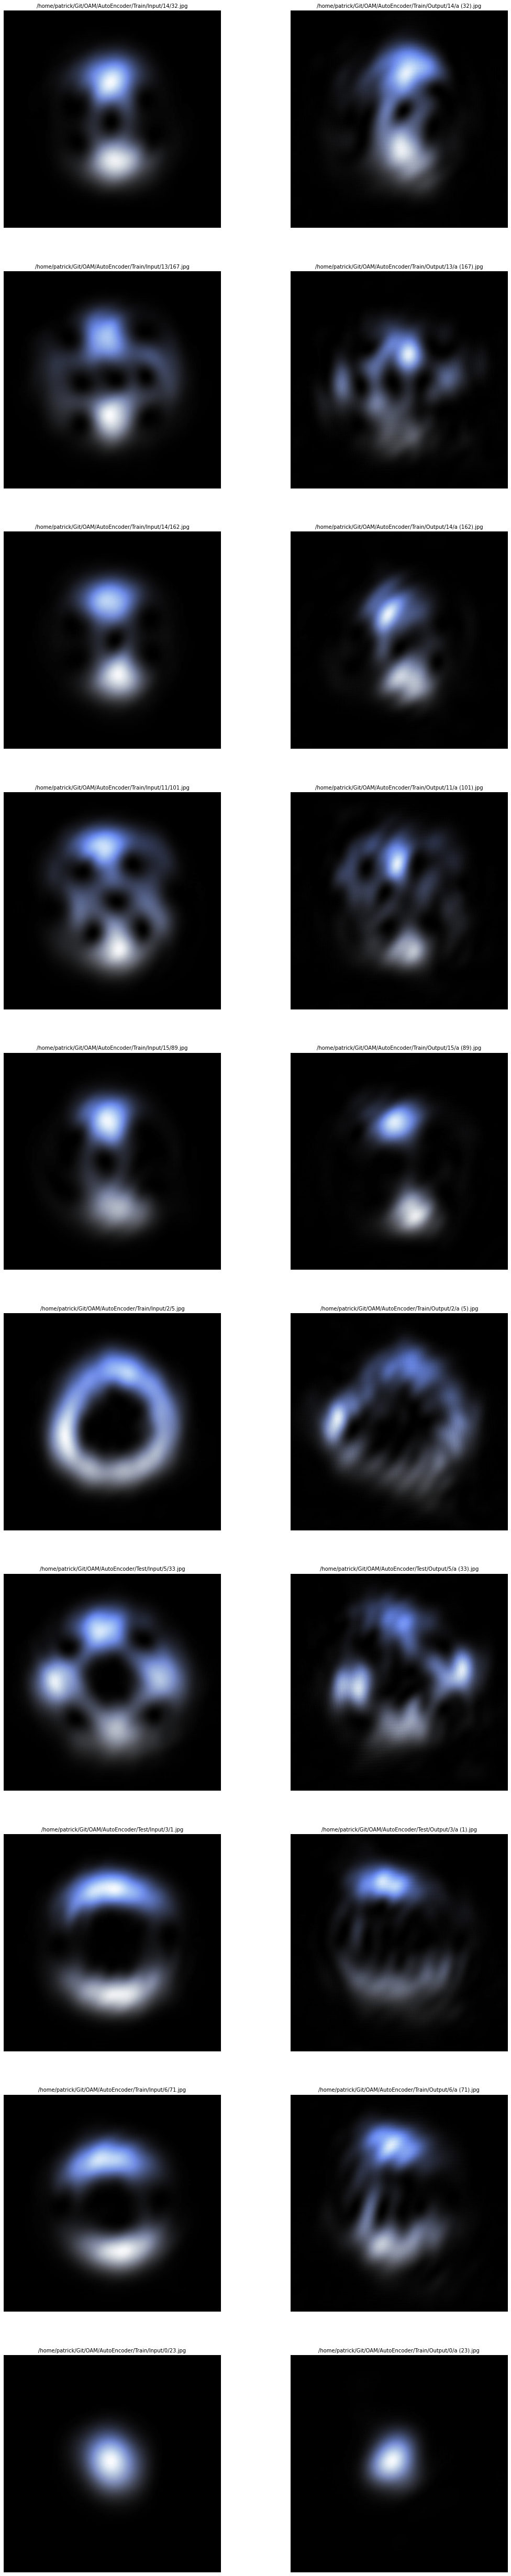

In [58]:
n = 10

fig, ax = plt.subplots(n, 2, figsize=(18,8*n))

for i, (idx, row) in enumerate(df.sample(n).iterrows()):

    x_path = row['x']
    y_path = row['y']
    
    x = np.asarray(Image.open(x_path))
    y = np.asarray(Image.open(y_path))
    
    ax[i][0].imshow(x)
    ax[i][1].imshow(y)

    ax[i][0].axis('off')
    ax[i][1].axis('off')

    ax[i][0].set_title(x_path, fontsize=10)
    ax[i][1].set_title(y_path, fontsize=10)